# DATA 602 Assignment 5 - Regression on EDA Dataset

#### Importing all the required packages Pandas, Numpy, CSV, matplotlib, seaborn

In [1]:
import pandas as pd
import numpy as np  
import csv
import matplotlib.pyplot as plt 
import statsmodels.api as smf

#### Defining the dataset of Life Expectancy Data of different countries over the years

In [2]:
df = pd.read_csv('Life Expectancy Data.csv')
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


#### Droppoing unnecessary columns in the dataset

In [3]:
df1=df.drop(columns=['Country', 'Status','Measles ','under-five deaths '])
df1

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,65.0,263.0,62,0.01,71.279624,65.0,19.1,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,18.6,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,18.1,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,59.5,272.0,69,0.01,78.184215,67.0,17.6,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,59.2,275.0,71,0.01,7.097109,68.0,17.2,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.3,723.0,27,4.36,0.000000,68.0,27.1,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,44.5,715.0,26,4.06,0.000000,7.0,26.7,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,44.8,73.0,25,4.43,0.000000,73.0,26.3,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,45.3,686.0,25,1.72,0.000000,76.0,25.9,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


#### Displaying the datatype of all the columns present

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Life expectancy                  2928 non-null   float64
 2   Adult Mortality                  2928 non-null   float64
 3   infant deaths                    2938 non-null   int64  
 4   Alcohol                          2744 non-null   float64
 5   percentage expenditure           2938 non-null   float64
 6   Hepatitis B                      2385 non-null   float64
 7    BMI                             2904 non-null   float64
 8   Polio                            2919 non-null   float64
 9   Total expenditure                2712 non-null   float64
 10  Diphtheria                       2919 non-null   float64
 11   HIV/AIDS                        2938 non-null   float64
 12  GDP                 

#### Changing the datatype as required for performing Regression Model

In [5]:
df1['Year'] = df1['Year'].astype(float)
df1['infant deaths'] = df1['infant deaths'].astype(float)

#### Finding the missing values in the dataset

In [6]:
df1.isnull().sum()

Year                                 0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
 BMI                                34
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

#### Filling the missing values with the median value

In [7]:
df2=df1.fillna(df.median())

#### Dispalying the new cleaned dataset

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   float64
 1   Life expectancy                  2938 non-null   float64
 2   Adult Mortality                  2938 non-null   float64
 3   infant deaths                    2938 non-null   float64
 4   Alcohol                          2938 non-null   float64
 5   percentage expenditure           2938 non-null   float64
 6   Hepatitis B                      2938 non-null   float64
 7    BMI                             2938 non-null   float64
 8   Polio                            2938 non-null   float64
 9   Total expenditure                2938 non-null   float64
 10  Diphtheria                       2938 non-null   float64
 11   HIV/AIDS                        2938 non-null   float64
 12  GDP                 

#### Creating a OLS regression model using Statmodels

In [9]:
OtrCol = [col for col in df2.columns if col != 'Life expectancy ']
df2['count'] = 1
OLS = smf.OLS(df2['Life expectancy '], df2[OtrCol]).fit()
print(OLS.summary())

                                 OLS Regression Results                                
Dep. Variable:       Life expectancy    R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          4.803e+04
Date:                Mon, 11 Oct 2021   Prob (F-statistic):                        0.00
Time:                        23:51:34   Log-Likelihood:                         -8365.7
No. Observations:                2938   AIC:                                  1.677e+04
Df Residuals:                    2921   BIC:                                  1.687e+04
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

#### Predicting the Life Expectancy value based on the actual value in the dataset

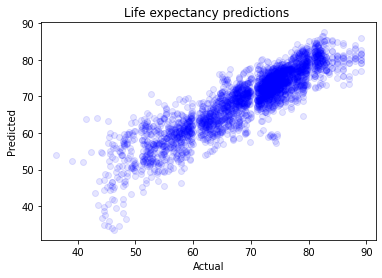

In [10]:
LEPrdt = OLS.predict(df2[OtrCol])

plt.plot(df2['Life expectancy '], LEPrdt, 'bo', alpha=0.1)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Life expectancy predictions ')
plt.show()


#### Histogram showing distribution of actual and predicted values of Life Expectancy

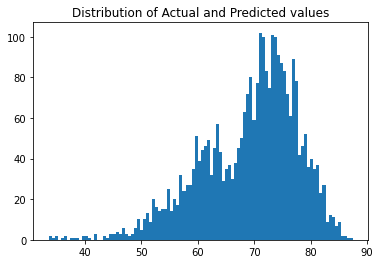

In [11]:
plt.hist(LEPrdt, bins=100)
plt.title('Distribution of Actual and Predicted values')
plt.show()

#### Splitting the Dataset to Training and Test data

In [12]:
from sklearn.model_selection import train_test_split

y = df2['Life expectancy ']
X = df2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

print(f'Training examples: {X_train.shape[0]:,}')
print(f'Test examples: {X_test.shape[0]:,}')

Training examples: 2,350
Test examples: 588


#### Creating a Pipeline to preprocess the data 

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

modeling_pipeline = Pipeline([('data_processing', StandardScaler()), ('lm', LinearRegression())])
modeling_pipeline.fit(X_train, y_train)

Pipeline(steps=[('data_processing', StandardScaler()),
                ('lm', LinearRegression())])

#### Evaluating the model on the test data

In [14]:
modeling_pipeline.score(X_train, y_train)

1.0

In [15]:
modeling_pipeline.score(X_test, y_test)

1.0

#### Creating a Ridge model

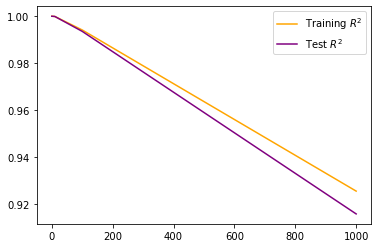

In [17]:
from sklearn.linear_model import Ridge
alphas = [0.01, 0.1, 1, 10, 100, 1000]
training_scores = []
test_scores = []
for alpha in alphas:
    modeling_pipeline = Pipeline([('data_processing', StandardScaler()), ('lm', Ridge(alpha=alpha))])
    modeling_pipeline.fit(X_train, y_train)
    training_scores.append(modeling_pipeline.score(X_train, y_train))
    test_scores.append(modeling_pipeline.score(X_test, y_test))
    
plt.plot(alphas, training_scores, 'orange')
plt.plot(alphas, test_scores, 'purple')
plt.legend(['Training $R^2$', 'Test $R^2$'])
plt.show()